## "Model Prediksi Tingkat Emisi Karbon Dioksida: Perbandingan Antara Algoritma Random Forest dan XGBoost" (Machine Learning)
Kelompok 2

Kelas Machine Learning B

Anggota:
1. Fitri Indah Sari (21083010025)
2. Ellexia Leonie Gunawan (21083010027)
3. Chelsea Ayu Adhigiadany (21083010028)
4. Angela Lisanthoni (21083010032)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [29]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


## Preprocessing Data

### Deskripsi Data

In [30]:
# Memeriksa tipe data set
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [31]:
# Melihat deskripsi data secara statistik
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [32]:
df.describe(include='object')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


### Duplikasi Data

In [33]:
df.duplicated().sum()

1103

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(6282, 12)

### Missing Value

In [36]:
#Cek nilai Null
print(df.isna().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


### Feature Selection

In [37]:
df = df.drop(['Make', 'Model', 'Vehicle Class', 'Transmission','Fuel Type'], axis = 1)
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


### Korelasi

Text(0.5, 1.0, 'Matrix Correlation for Numeric Features ')

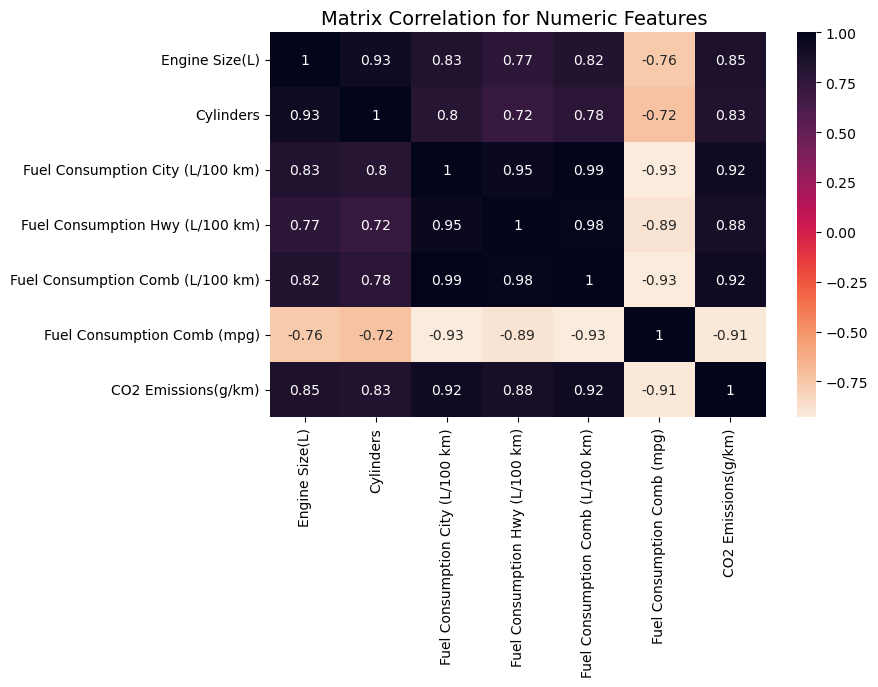

In [38]:
plt.figure(figsize = (8,5))
correlation_matrix = df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Matrix Correlation for Numeric Features ", size = 14)

### Outlier

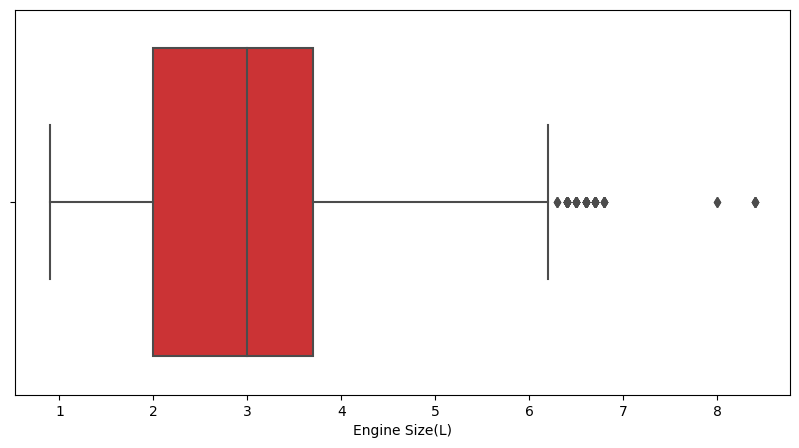

<Figure size 640x480 with 0 Axes>

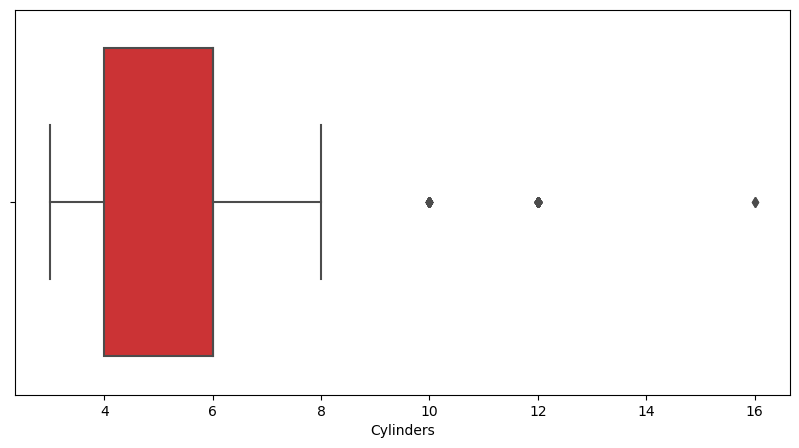

<Figure size 640x480 with 0 Axes>

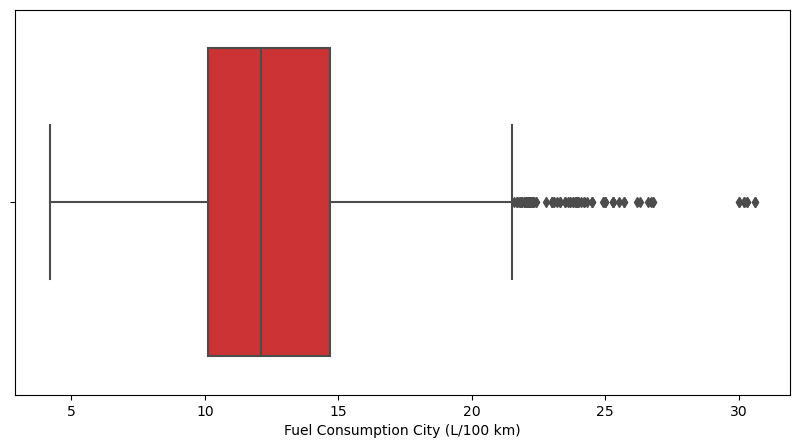

<Figure size 640x480 with 0 Axes>

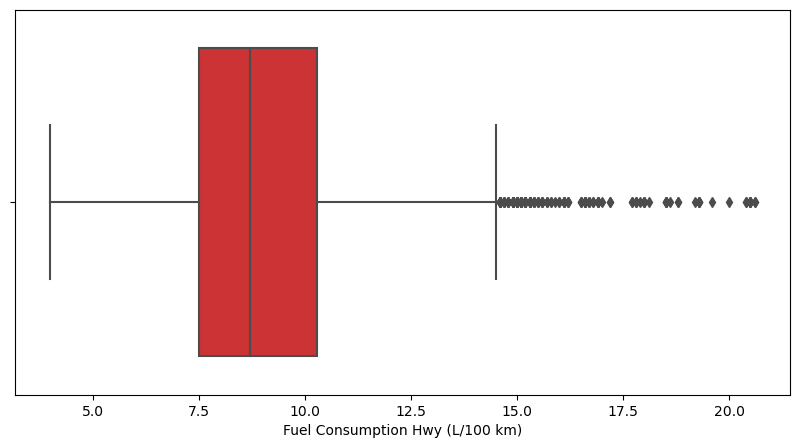

<Figure size 640x480 with 0 Axes>

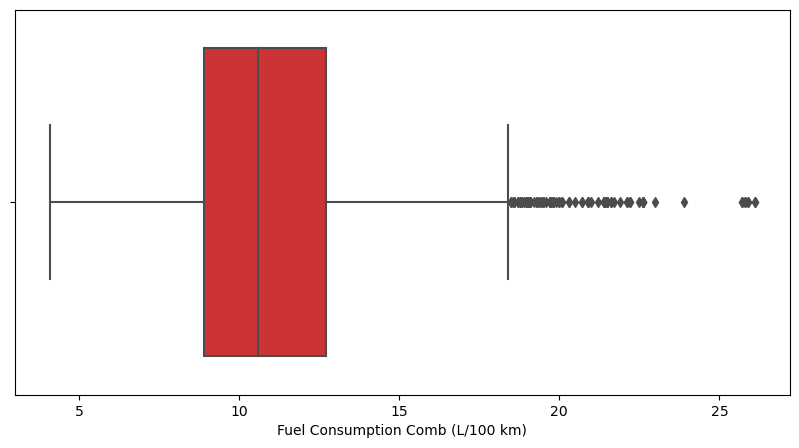

<Figure size 640x480 with 0 Axes>

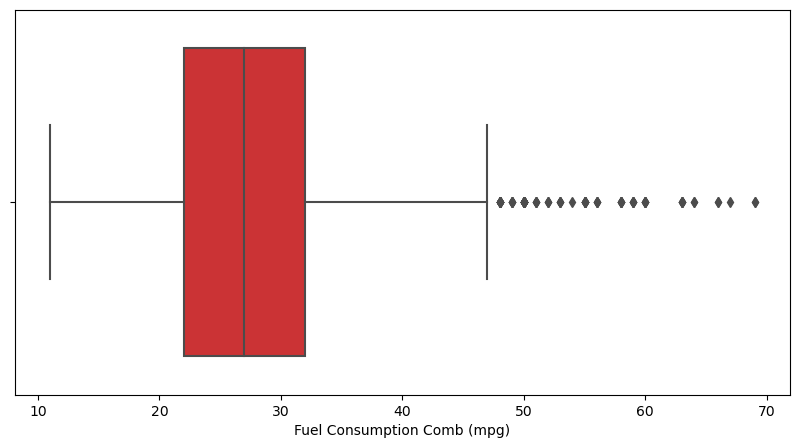

<Figure size 640x480 with 0 Axes>

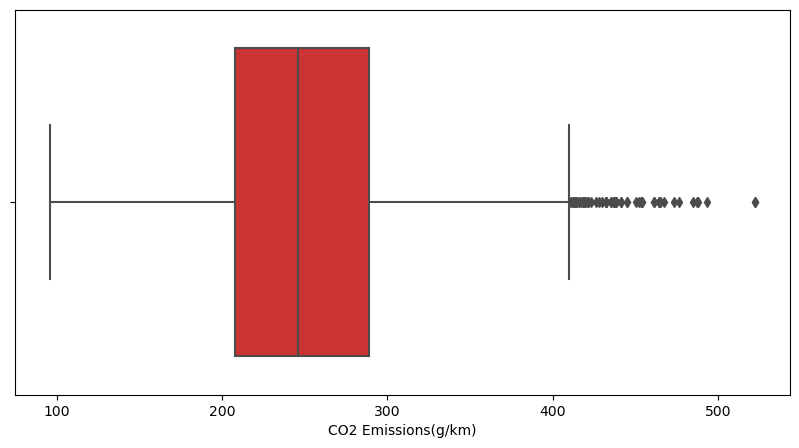

<Figure size 640x480 with 0 Axes>

In [39]:
#Outliers check
num_feat = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

for num in num_feat :
  plt.figure(figsize = (10,5))
  sns.boxplot(data = df, x = num, palette = 'Set1')
  plt.figure()

In [40]:
#IQR Method | Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
df.shape

(5816, 7)

### Visualisasi Penyebaran Data

array([[<AxesSubplot:title={'center':'Engine Size(L)'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Fuel Consumption City (L/100 km)'}>],
       [<AxesSubplot:title={'center':'Fuel Consumption Hwy (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (mpg)'}>],
       [<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

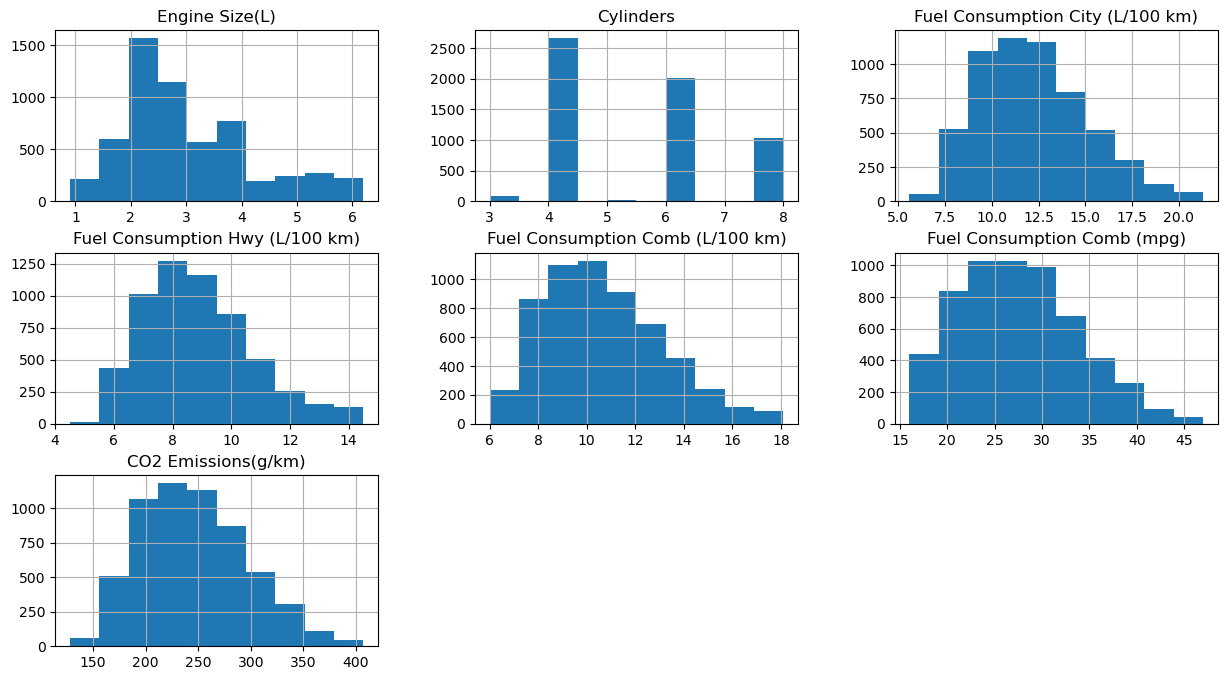

In [17]:
df.hist(figsize=(15, 8))

## Splitting Dataset

In [18]:
# Memisahkan variabel target dan fitur 
fitur = df.drop('CO2 Emissions(g/km)',1)
target = df['CO2 Emissions(g/km)']

fitur.head()

C:\Users\angela\AppData\Local\Temp\ipykernel_12772\577438890.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fitur = df.drop('CO2 Emissions(g/km)',1)


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
5,3.5,6,11.9,7.7,10.0,28


In [19]:
# proses standarisasi
from sklearn import preprocessing
X = fitur.values
X = preprocessing.scale(X)
y = target.values

In [20]:
# Membagi data latih dan data uji dengan perbandingan 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(4071, 6)
(1745, 6)


## Membangun Model, Evaluasi, dan Visualisasi

### Random Forest

In [21]:
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
start_time = time.time()
reg = RandomForestRegressor()
reg = reg.fit(X_train,y_train)
predict = reg.predict(X_test)
accuracy = reg.score(X_test, y_test)
mae = mean_absolute_error(y_test, predict)
end_time = time.time()
lama = end_time - start_time

print("Random Forest Regressor")
print("="*35)
print(f"R2 Score: {round(accuracy * 100, 2)}")
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_pred=predict,y_true=y_test)),2)}')
print(f"Mean Absolute Error: {round(mae, 2)}")
print("Lama pemrosesan: ", lama, "detik")

Random Forest Regressor
R2 Score: 97.59
RMSE: 7.71
Mean Absolute Error: 3.21
Lama pemrosesan:  0.9403965473175049 detik


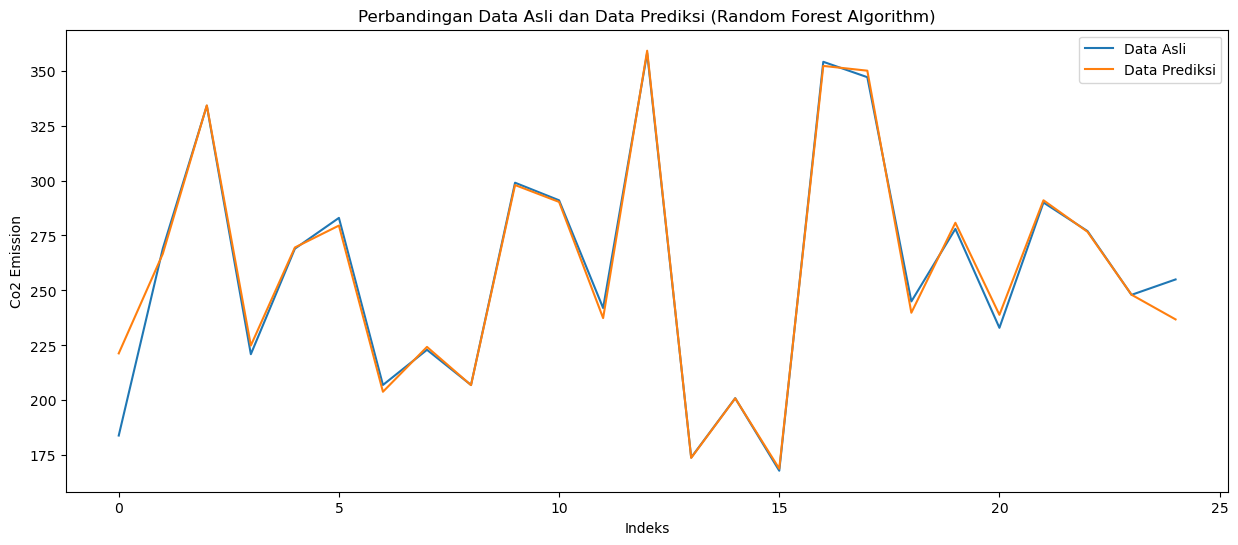

In [22]:
# Random Forest
# ukuran plot
plt.figure(figsize=(15, 6))

# membatasi jumlah data yang diplot menjadi 100 data awal
y_test_subset = y_test[:25]
predict_subset = predict[:25]

# membuat plot data asli
plt.plot(y_test_subset, label='Data Asli')

# membuat plot data prediksi
plt.plot(predict_subset, label='Data Prediksi')

# menambahkan judul dan label sumbu
plt.title('Perbandingan Data Asli dan Data Prediksi (Random Forest Algorithm)')
plt.xlabel('Indeks')
plt.ylabel('Co2 Emission')

# menampilkan legenda
plt.legend()

# menampilkan plot
plt.show()

In [23]:
#Random Forest
df1 = pd.DataFrame({'Data Asli': y_test, 'Prediksi': predict})

# mencetak dataframe perbandingan
df1.head(25)

,Data Asli,Prediksi
0,184,221.367500
1,269,266.637833
2,334,334.187500
3,221,224.942500
4,269,269.537778
5,283,279.506667
6,207,203.917500
7,223,224.315536
8,207,206.940000
9,299,297.946238


### XGBoost

In [24]:
import xgboost as xgb
start_time = time.time()
xgb_model = xgb.XGBRegressor(objective="reg:squarederror",  n_estimators=1000, random_state=42,n_jobs=-1)
xgb_model.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)],verbose = 0)
y_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred)
end_time = time.time()
lama = end_time - start_time
print("XGBOOST")
print("="*35)
print(f'R2 Score: {round(xgb_model.score(X_test,y_test)*100,2)}')
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test)),2)}')
print(f"Mean Absolute Error: {round(xgb_mae, 2)}")
print("Lama pemrosesan: ", lama, "detik")

C:\Users\angela\coba\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBOOST
R2 Score: 98.03
RMSE: 6.98
Mean Absolute Error: 3.18
Lama pemrosesan:  0.30234718322753906 detik


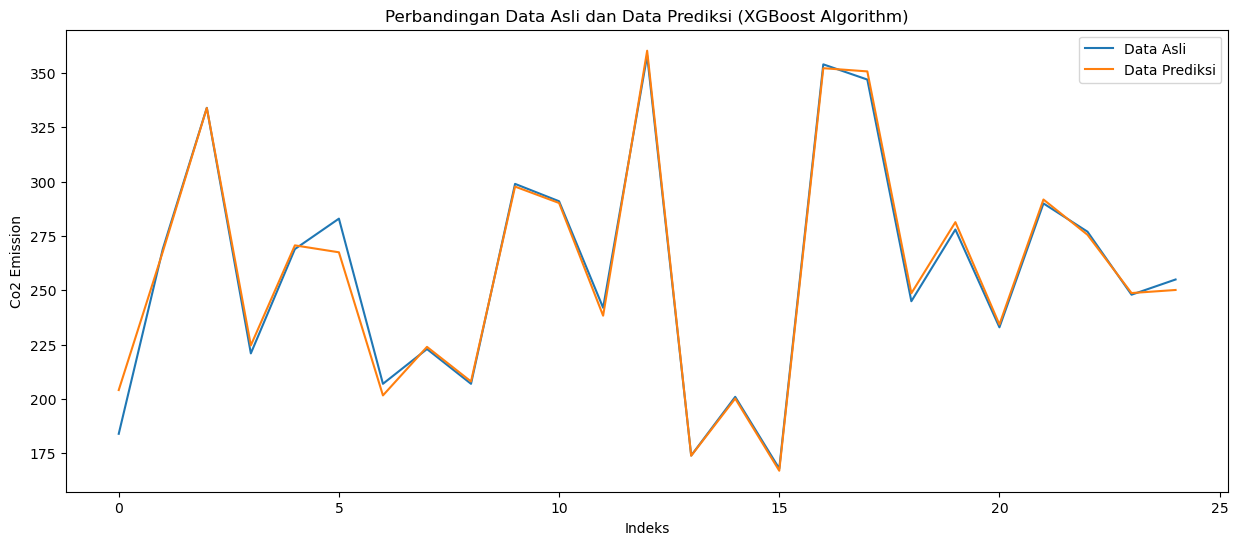

In [25]:
#XGBoost
import pandas as pd
import matplotlib.pyplot as plt

# ukuran plot
plt.figure(figsize=(15, 6))

# membatasi jumlah data yang diplot menjadi 25 data awal
y_test_subset = y_test[:25]
y_pred_subset = y_pred[:25]

# membuat plot data asli
plt.plot(y_test_subset, label='Data Asli')

# membuat plot data prediksi
plt.plot(y_pred_subset, label='Data Prediksi')

# menambahkan judul dan label sumbu
plt.title('Perbandingan Data Asli dan Data Prediksi (XGBoost Algorithm)')
plt.xlabel('Indeks')
plt.ylabel('Co2 Emission')

# menampilkan legenda
plt.legend()

# menampilkan plot
plt.show()

In [26]:
# XGBoost
df2 = pd.DataFrame({'Data Asli': y_test, 'Prediksi': y_pred})

# mencetak dataframe perbandingan
df2.head(25)

,Data Asli,Prediksi
0,184,204.132965
1,269,267.726257
2,334,333.931427
3,221,224.686188
4,269,270.706726
5,283,267.519196
6,207,201.661789
7,223,223.997910
8,207,208.072968
9,299,297.754028
